# **importing the required libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy.stats.mstats import trimmed_var
import plotly.express as px 
import pickle
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.utils.validation import check_is_fitted
import warnings
import pickle
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
df=pd.read_csv('MARKETING CAMPAIGN DATA.csv')
df.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
#inspecting different columns and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
#checking for missing values
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [5]:
#Dealing with missing values
missing_income = df['Income'].isnull().sum()
missing_income/len(df)*100

np.float64(1.0714285714285714)

In [6]:
#Imputing missing values in income column 
#the data is no symetric i will impute with median
median_income=df["Income"].median()
df["Income"]=df["Income"].fillna(median_income)
print(f"Median used: {median_income}")
print("Missing after fill:", df['Income'].isnull().sum())  # 0

Median used: 51381.5
Missing after fill: 0


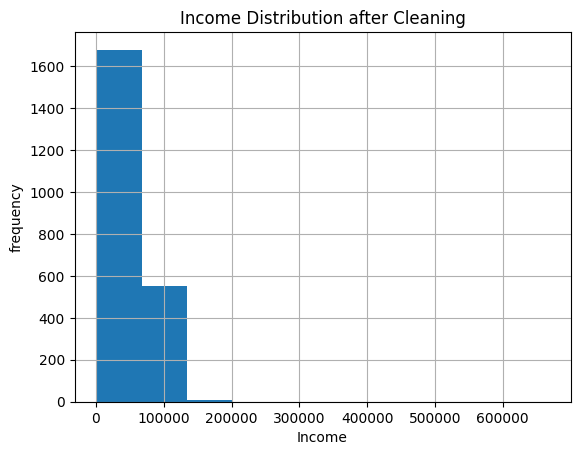

In [7]:
#Histogram of income after imputation
df["Income"].hist(bins=10),
plt.title('Income Distribution after Cleaning')
plt.xlabel('Income')
plt.ylabel('frequency');

In [8]:
#more EDA
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52237.975446,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25037.955891,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [9]:
#adding age to be one of the features
# Get current year (dynamically; as of now, it's 2025)
current_year = datetime.now().year

# Add 'Age' column: current year minus birth year
df['Age'] = current_year - df['Year_Birth'] 
# Quick check
print(df[['Year_Birth', 'Age']].head())
print("Age stats:", df['Age'].describe())

   Year_Birth  Age
0        1957   68
1        1954   71
2        1965   60
3        1984   41
4        1981   44
Age stats: count    2240.000000
mean       56.194196
std        11.984069
min        29.000000
25%        48.000000
50%        55.000000
75%        66.000000
max       132.000000
Name: Age, dtype: float64


In [10]:
#Identifying high_cardinality features and low_cardinality features 
df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1975
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
Age                      59
dtype: int64

In [11]:
#Droping high cardinality features (ID),low cardinality features (Z_CostContact,Z_Revenue)and year_Birth which we used to calculate age 

df=df.drop(columns=["Z_CostContact","Z_Revenue","ID","Year_Birth"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2240 non-null   object 
 1   Marital_Status       2240 non-null   object 
 2   Income               2240 non-null   float64
 3   Kidhome              2240 non-null   int64  
 4   Teenhome             2240 non-null   int64  
 5   Dt_Customer          2240 non-null   object 
 6   Recency              2240 non-null   int64  
 7   MntWines             2240 non-null   int64  
 8   MntFruits            2240 non-null   int64  
 9   MntMeatProducts      2240 non-null   int64  
 10  MntFishProducts      2240 non-null   int64  
 11  MntSweetProducts     2240 non-null   int64  
 12  MntGoldProds         2240 non-null   int64  
 13  NumDealsPurchases    2240 non-null   int64  
 14  NumWebPurchases      2240 non-null   int64  
 15  NumCatalogPurchases  2240 non-null   i

In [12]:
# Checking for multi-corrlinearity in numerical data in df 
#
correlation=df.select_dtypes("number").corr()
correlation

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
Income,1.000000,-0.425326,0.018965,-0.004061,0.576903,0.428791,0.577805,0.437564,0.436131,0.321938,...,0.526600,-0.549785,-0.016064,0.182718,0.334893,0.274891,0.087581,-0.027187,0.132867,0.160899
Kidhome,-0.425326,1.000000,-0.036133,0.008827,-0.496297,-0.372581,-0.437129,-0.387644,-0.370673,-0.349595,...,-0.499683,0.447846,0.014674,-0.161600,-0.205634,-0.172339,-0.081716,0.040207,-0.080008,-0.230176
Teenhome,0.018965,-0.036133,1.000000,0.016198,0.004846,-0.176764,-0.261160,-0.204187,-0.162475,-0.021725,...,0.050695,0.134884,-0.042677,0.038886,-0.191050,-0.140090,-0.015605,0.003138,-0.154446,0.352111
Recency,-0.004061,0.008827,0.016198,1.000000,0.016064,-0.004306,0.023056,0.001079,0.022670,0.016693,...,0.000799,-0.021445,-0.032991,0.018826,0.000129,-0.019283,-0.001781,0.013231,-0.198437,0.019871
MntWines,0.576903,-0.496297,0.004846,0.016064,1.000000,0.389637,0.562667,0.399753,0.386581,0.387516,...,0.642100,-0.320653,0.062202,0.373286,0.472613,0.354133,0.205907,-0.039007,0.247254,0.157773
MntFruits,0.428791,-0.372581,-0.176764,-0.004306,0.389637,1.000000,0.543105,0.594804,0.567164,0.392995,...,0.461758,-0.418383,0.014727,0.010152,0.215833,0.194748,-0.009773,-0.005166,0.125289,0.017917
MntMeatProducts,0.577805,-0.437129,-0.261160,0.023056,0.562667,0.543105,1.000000,0.568402,0.523846,0.350609,...,0.479659,-0.539470,0.018272,0.102912,0.373769,0.309761,0.043033,-0.023483,0.236335,0.030872
MntFishProducts,0.437564,-0.387644,-0.204187,0.001079,0.399753,0.594804,0.568402,1.000000,0.579870,0.422875,...,0.459855,-0.446003,0.000357,0.016843,0.199578,0.260762,0.002577,-0.020953,0.111331,0.041625
MntSweetProducts,0.436131,-0.370673,-0.162475,0.022670,0.386581,0.567164,0.523846,0.579870,1.000000,0.369724,...,0.448756,-0.423294,0.001530,0.028641,0.259590,0.241818,0.009985,-0.022485,0.117372,0.018133
MntGoldProds,0.321938,-0.349595,-0.021725,0.016693,0.387516,0.392995,0.350609,0.422875,0.369724,1.000000,...,0.381678,-0.250719,0.123091,0.022268,0.181021,0.166396,0.049990,-0.030861,0.139850,0.061818


(Text(0.5, 1.0, 'Customer Features Correlation Heatmap'),)

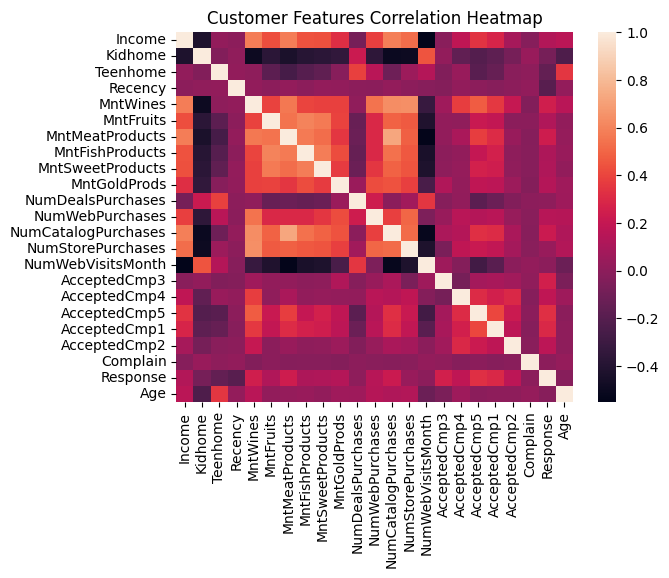

In [13]:
#correlation heatmap for easier visualisation of correlation
sns.heatmap(correlation)
plt.title('Customer Features Correlation Heatmap'),


In [14]:
# Calculate variance, get 10 high variance features (only on numeric columns)
numeric_cols = df.select_dtypes(include=['number']).columns
top_10_var = df[numeric_cols].var().sort_values().tail(10)
print(top_10_var)

NumStorePurchases    1.056873e+01
Age                  1.436179e+02
Recency              8.388237e+02
MntFruits            1.581926e+03
MntSweetProducts     1.704080e+03
MntGoldProds         2.721442e+03
MntFishProducts      2.984325e+03
MntMeatProducts      5.094743e+04
MntWines             1.132978e+05
Income               6.268992e+08
dtype: float64


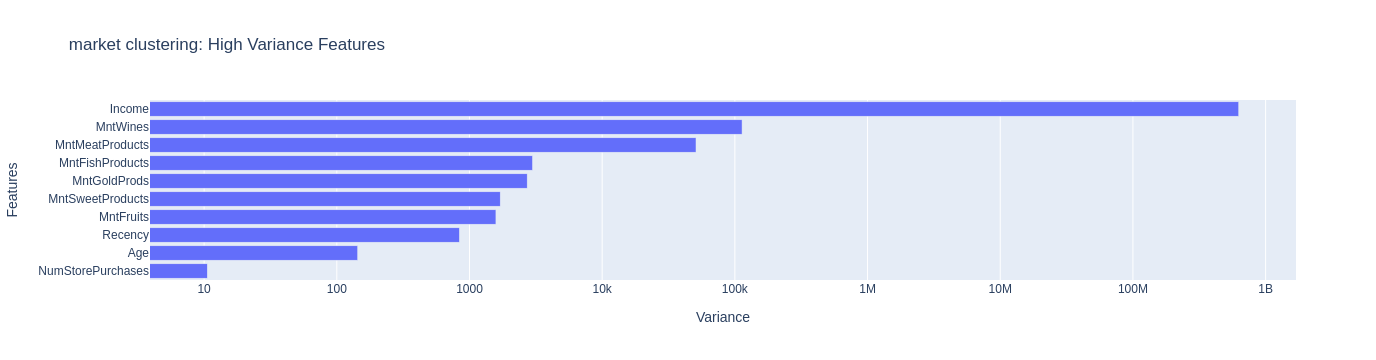

In [15]:

# Create horizontal bar chart of `top_ten_trim_var`
#import plotly.express as px this is the library used here
fig = px.bar(
    x=top_10_var,
    y=top_10_var.index,
    orientation="h",
    title="market clustering: High Variance Features")
fig.update_layout(xaxis_title=" Variance ",yaxis_title="Features")
fig.update_xaxes(type='log')
fig.write_image("marketing_high_var_feat.png", scale=3)
fig.show()

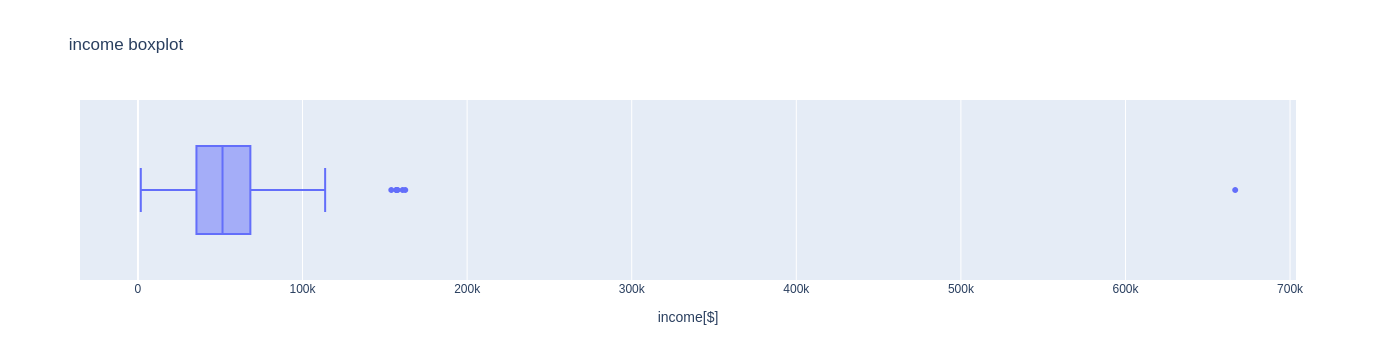

In [16]:
#building a box plot
fig=px.box(
    data_frame=df,
    x="Income",
    title="income boxplot"
)
fig.update_layout(xaxis_title="income[$]")

fig.show()

In [17]:
#Extract feature names
high_var_feature=top_10_var.index.tolist()
high_var_feature

['NumStorePurchases',
 'Age',
 'Recency',
 'MntFruits',
 'MntSweetProducts',
 'MntGoldProds',
 'MntFishProducts',
 'MntMeatProducts',
 'MntWines',
 'Income']

In [18]:
#split
X=df[high_var_feature]
print("X.shape:",X.shape)

X.shape: (2240, 10)


In [19]:
X_summary=X.aggregate(["mean","std"])
X_summary

,NumStorePurchases,Age,Recency,MntFruits,MntSweetProducts,MntGoldProds,MntFishProducts,MntMeatProducts,MntWines,Income
mean,5.790179,56.194196,49.109375,26.302232,27.062946,44.021875,37.525446,166.950000,303.935714,52237.975446
std,3.250958,11.984069,28.962453,39.773434,41.280498,52.167439,54.628979,225.715373,336.597393,25037.955891


In [20]:
#starndadization using standard scaler
#instantiate standard scaler
ss =StandardScaler()
# Transform `X`
X_scaled_data = ss.fit_transform(X)
# Put `X_scaled_data` into DataFrame
X_scaled = pd.DataFrame(X_scaled_data,columns=X.columns)

print("X_scaled type:", type(X_scaled))
print("X_scaled shape:", X_scaled.shape)
X_scaled.head()

X_scaled type: <class 'pandas.core.frame.DataFrame'>
X_scaled shape: (2240, 10)


,NumStorePurchases,Age,Recency,MntFruits,MntSweetProducts,MntGoldProds,MntFishProducts,MntMeatProducts,MntWines,Income
0,-0.550785,0.985345,0.307039,1.551577,1.476500,0.843207,2.462147,1.679702,0.983781,0.235696
1,-1.166125,1.235733,-0.383664,-0.636301,-0.631503,-0.729006,-0.650449,-0.713225,-0.870479,-0.235454
2,1.295237,0.317643,-0.798086,0.570804,-0.146905,-0.038766,1.345274,-0.177032,0.362723,0.773999
3,-0.550785,-1.268149,-0.798086,-0.560857,-0.583043,-0.748179,-0.503974,-0.651187,-0.870479,-1.022355
4,0.064556,-1.017761,1.550305,0.419916,-0.001525,-0.556446,0.155164,-0.216914,-0.389085,0.241888


In [21]:
X_scaled_summary = X_scaled.aggregate(["mean","std"]).astype(int
                                                        
                                                            )

print("X_scaled_summary type:", type(X_scaled_summary))
print("X_scaled_summary shape:", X_scaled_summary.shape)
X_scaled_summary

X_scaled_summary type: <class 'pandas.core.frame.DataFrame'>
X_scaled_summary shape: (2, 10)


,NumStorePurchases,Age,Recency,MntFruits,MntSweetProducts,MntGoldProds,MntFishProducts,MntMeatProducts,MntWines,Income
mean,0,0,0,0,0,0,0,0,0,0
std,1,1,1,1,1,1,1,1,1,1


In [22]:
n_clusters = range(2,13)
inertia_errors = []
silhouette_scores =[]

# Add `for` loop to train model and calculate inertia, silhouette score.
for k in n_clusters:
    #build model
    model=make_pipeline(StandardScaler(),KMeans(n_clusters=k,random_state=42))
    #train model
    model.fit(X)
    #calculate inertia
    inertia_errors.append(model.named_steps["kmeans"].inertia_)
    #calculate silhouette_ score
    silhouette_scores.append(silhouette_score(X,model.named_steps["kmeans"].labels_))

print("inertia_errors type:", type(inertia_errors))
print("inertia_errors len:", len(inertia_errors))
print("Inertia:", inertia_errors)
print()
print("silhouette_scores type:", type(silhouette_scores))
print("silhouette_scores len:", len(silhouette_scores))
print("Silhouette Scores:", silhouette_scores)

inertia_errors type: <class 'list'>
inertia_errors len: 11
Inertia: [14785.2636607747, 13035.88720413312, 12401.13899371947, 11535.117671709137, 11082.076005506742, 10614.1531811916, 10076.607084407779, 9601.579057293893, 9036.916112521198, 8781.854078320219, 8551.170687009326]

silhouette_scores type: <class 'list'>
silhouette_scores len: 11
Silhouette Scores: [0.47032337118345324, 0.2618369541894554, 0.20299579445206228, 0.014731407577812083, 0.0026059813660738334, -0.07536575531238271, -0.09454889262144588, -0.11905238336836053, -0.10964959342090516, -0.1302710640332882, -0.14387765583002343]


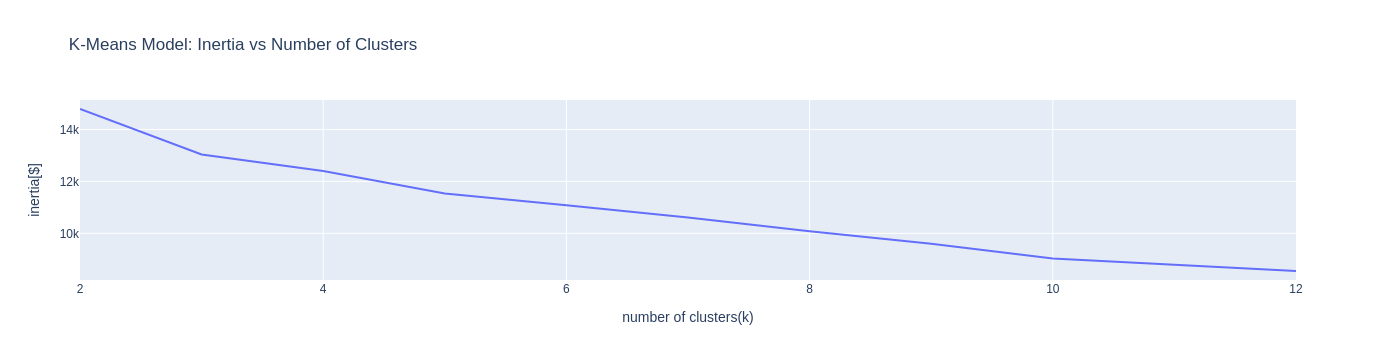

In [23]:
# Create line plot of `inertia_errors` vs `n_clusters`
fig = px.line(
    x=n_clusters,y=inertia_errors,title="K-Means Model: Inertia vs Number of Clusters"
)
fig.update_layout(xaxis_title="number of clusters(k)",yaxis_title="inertia[$]")
fig.write_image("inertia_errors vs n_clusters.png", scale=3)
fig.show()

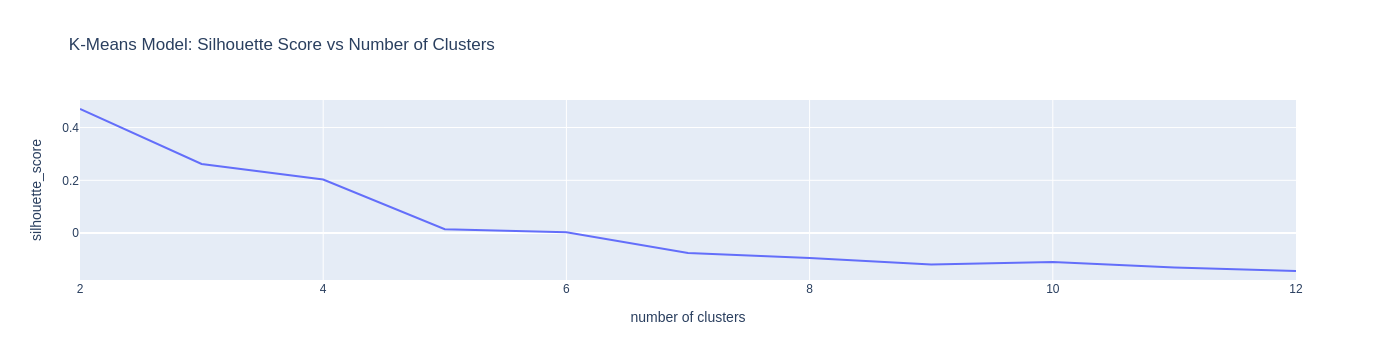

In [24]:
# Create a line plot of `silhouette_scores` vs `n_clusters`
fig = px.line(
    x=n_clusters,
    y=silhouette_scores,
    title="K-Means Model: Silhouette Score vs Number of Clusters"
)
fig.update_layout(xaxis_title="number of clusters",yaxis_title="silhouette_score")
fig.write_image("silhouette_scores vs n_clusters.png", scale=3)
fig.show()

In [25]:
# Build model final model as best n=3
final_model = make_pipeline(
    StandardScaler(),
    KMeans(n_clusters=3,random_state=42)
)

# Fit model to data
final_model.fit(X)


,steps,"[('standardscaler', ...), ('kmeans', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300


In [26]:
# Assert that model has been fit to data
check_is_fitted(final_model)

In [27]:
labels =final_model.named_steps["kmeans"].labels_
print("labels type:", type(labels))
print("labels len:", len(labels))
print(labels[:5])

labels type: <class 'numpy.ndarray'>
labels len: 2240
[2 0 1 0 0]


In [28]:
#centroids
xgb = X.groupby(labels).mean()

print("xgb type:", type(xgb))
print("xgb shape:", xgb.shape)
xgb

xgb type: <class 'pandas.core.frame.DataFrame'>
xgb shape: (3, 10)


,NumStorePurchases,Age,Recency,MntFruits,MntSweetProducts,MntGoldProds,MntFishProducts,MntMeatProducts,MntWines,Income
0,3.472315,54.191275,48.895973,5.544463,5.703020,18.856544,8.417785,31.140101,65.595638,36691.584732
1,8.421927,60.529900,49.935216,24.729236,26.370432,63.006645,37.089701,208.420266,587.350498,65050.584718
2,8.432735,55.695067,48.565022,83.903587,85.085202,85.654709,115.908072,473.946188,558.387892,76493.820628


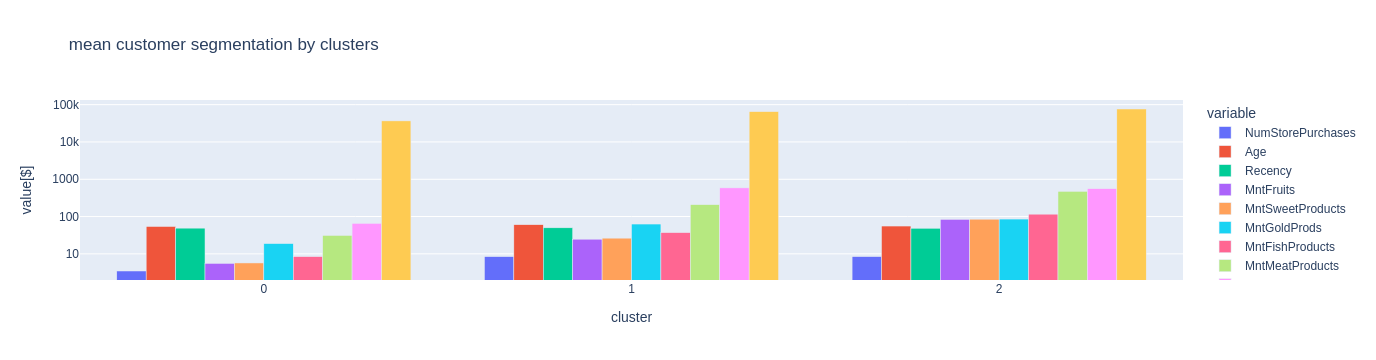

In [29]:
# Create side-by-side bar chart of `xgb`
fig = px.bar(
    xgb,
    barmode="group",
    title="mean customer segmentation by clusters"
    
) 
fig.update_layout(xaxis_title="cluster",yaxis_title="value[$]"),
fig.update_yaxes(type="log")
# save
fig.write_image("Customer_segmentation.png", scale=3)


fig.show()

In [30]:
# Instantiate transformer
pca = PCA(n_components=2,random_state=42)

# Transform `X`
X_t = pca.fit_transform(X)

# Put `X_t` into DataFrame
X_pca = pd.DataFrame(X_t,columns=["PC1","PC2"])
print("X_pca type:", type(X_pca))
print("X_pca shape:", X_pca.shape)
X_pca.head()

X_pca type: <class 'pandas.core.frame.DataFrame'>
X_pca shape: (2240, 2)


,PC1,PC2
0,5904.546932,399.144788
1,-5896.916231,-280.673445
2,19374.975305,-73.396246
3,-25593.951997,-94.669261
4,6053.481381,-195.204785


Resorting to unclean kill browser.


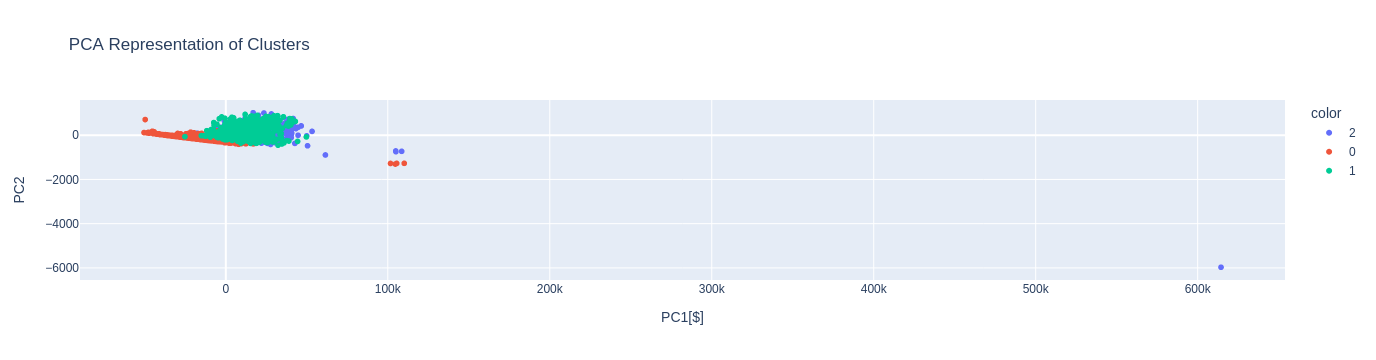

In [31]:
# Create scatter plot of `PC2` vs `PC1`
fig =px.scatter(
    data_frame=X_pca,
    x="PC1",
    y="PC2",
    color=labels.astype(str),
    title= "PCA Representation of Clusters"
)
fig.update_layout(xaxis_title="PC1[$]",yaxis_title="PC2")
fig.write_image("PCA_scatter_plot.png", scale=3)
fig.show()

In [32]:
#saving model as a pickle file saving as churn-predicting-model
with open("market-segmentation-predicting-model","wb") as f:
    pickle.dump(final_model,f)

In [ ]:
#loading the model
with open("market-segmentation-predicting-model","rb") as f:
    loaded_final_model=pickle.load(f)
print(loaded_final_model)